In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
import matplotlib.path as mpath
import yfinance as yf


In [126]:
companies = ['Cap_63', 'Cap_126', 'Ele_63', 'Ele_126', 'Fin_63', 'Fin_126', 'FinEle_63', 'FinEle_126']
company = 'Ele_126'
company_2 = 'Ele_63'
print(company)
top = 20
input_path = f'../../03 Modeling/{company}'
input_path_2 = f'../../03 Modeling/{company_2}'

full_lambda = pd.read_csv(f'{input_path}/full_lambda.csv', index_col='Date', parse_dates=['Date'])
FRM = full_lambda.mean(axis=1) * full_lambda.shape[1] / top

full_lambda_2 = pd.read_csv(f'{input_path_2}/full_lambda.csv', index_col='Date', parse_dates=['Date'])
FRM_2 = full_lambda_2.mean(axis=1) * full_lambda_2.shape[1] / top

start_date = pd.to_datetime(FRM_2.index)[0].strftime('%Y-%m-%d')
end_date = pd.to_datetime(FRM_2.index)[-1].strftime('%Y-%m-%d')


covid = pd.read_csv('covid-19.csv')
covid.index = pd.to_datetime(covid['Date'])
covid['Taiwan Daily'] = covid['Taiwan_Accumulate'].diff().fillna(0)

FED = pd.read_csv('FEDFUNDS.csv', index_col='Date', parse_dates=['Date'])
FED = FED.resample('D').ffill()
FED = FED.loc[FRM.index]

index = pd.DataFrame(yf.download('^TWII', start=start_date, end=end_date)['Adj Close'])

MI = pd.read_csv('../../01 Raw Data/Others/MI.csv', index_col='Date', parse_dates=['Date'])
MI_D = MI.reindex(pd.date_range(start=MI.index.min(), end=MI.index.max(), freq='D'))
MI_D = MI_D.ffill()

VIX = pd.read_csv('../../01 Raw Data/Others/VIXTWN.csv', index_col='Date', parse_dates=['Date'])

# fig, (ax3, ax1, ax4, ax5) = plt.subplots(4, 1, figsize=(15, 12), gridspec_kw={'height_ratios': [1, 1, 1, 1]}, sharex=True)

Ele_126
[*********************100%%**********************]  1 of 1 completed


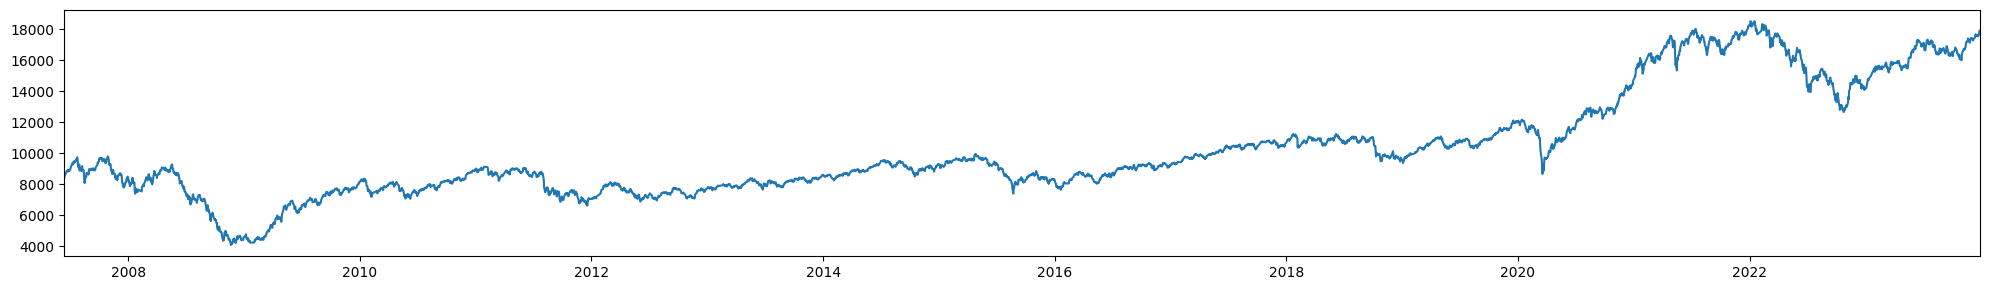

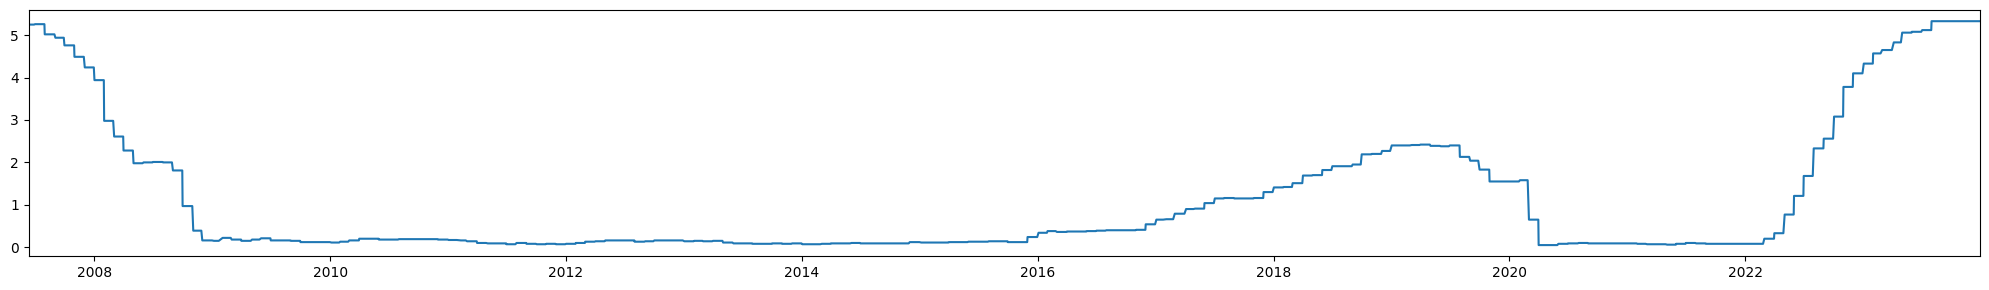

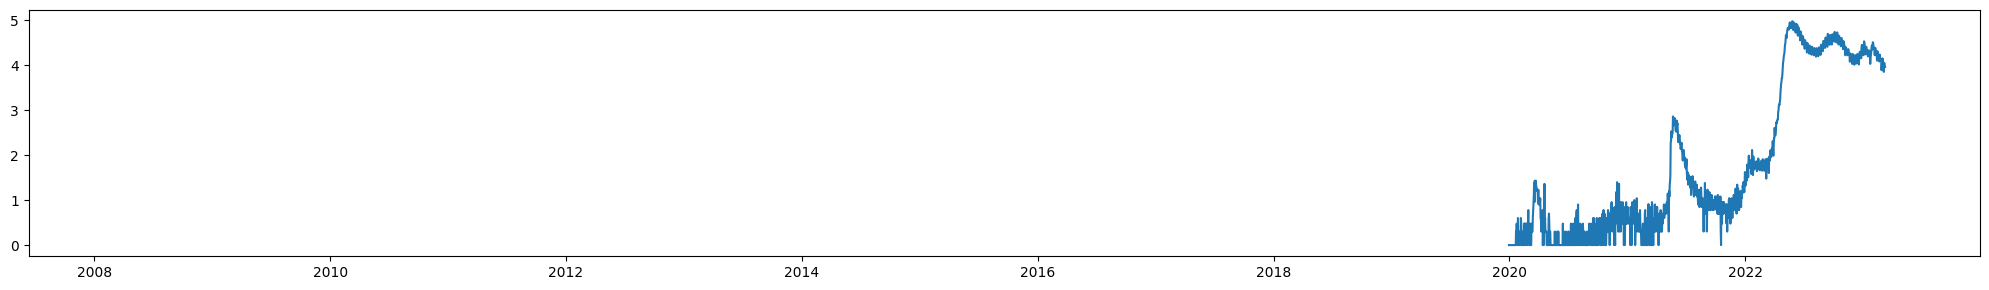

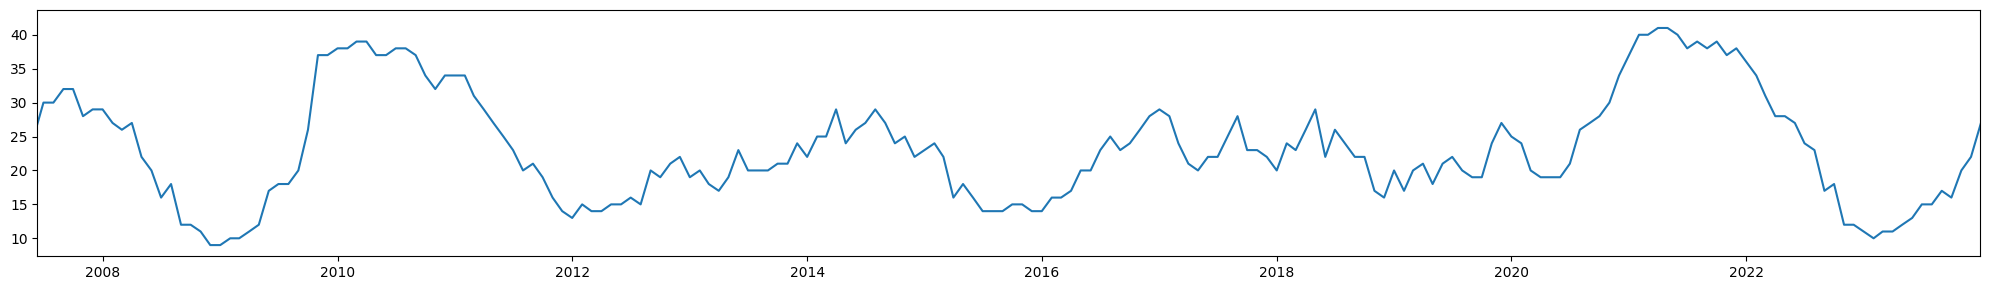

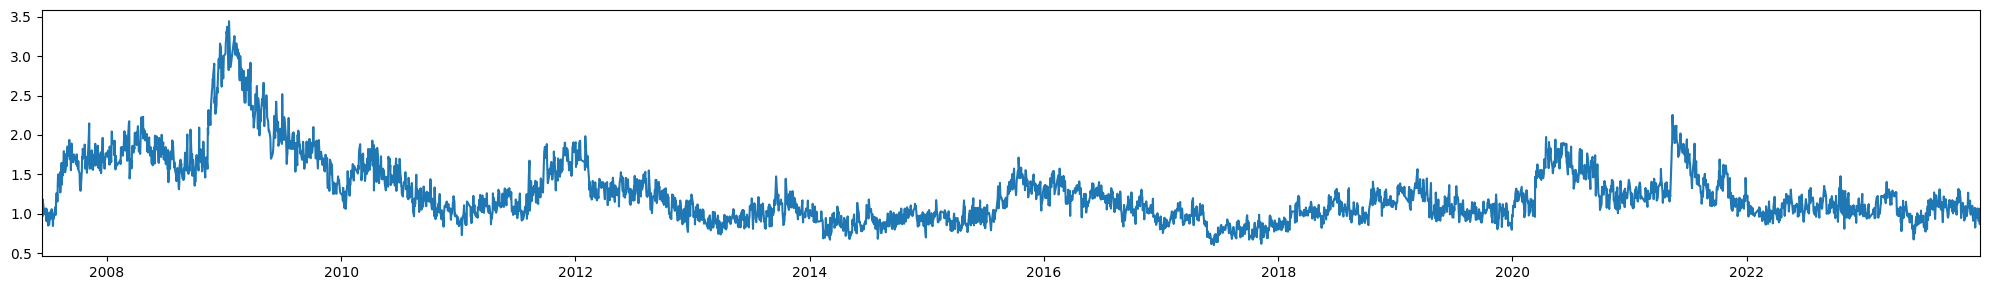

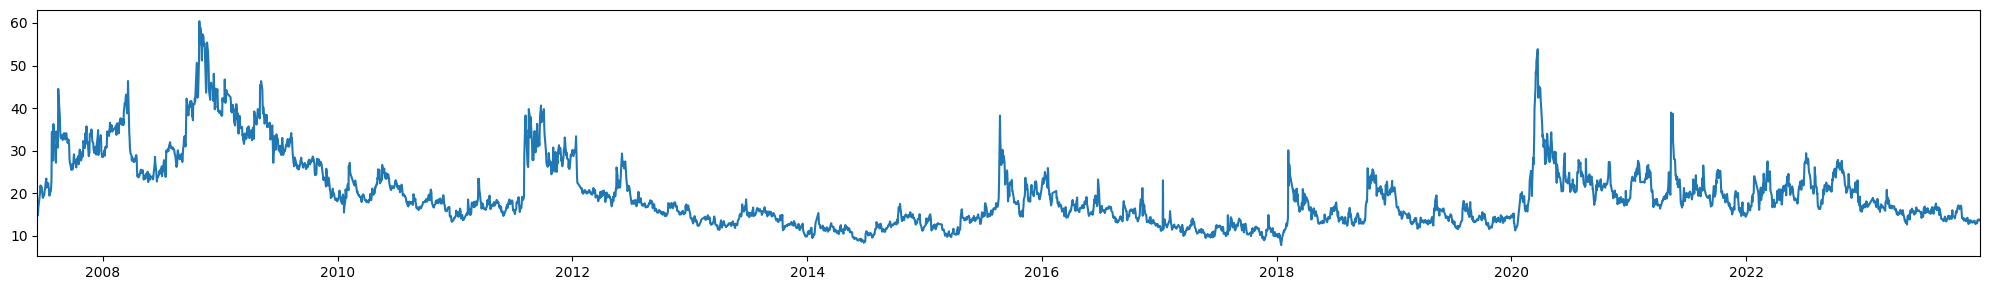

In [120]:
# fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(4, 1, figsize=(15, 12), gridspec_kw={'height_ratios': [1, 1, 1, 1]}, sharex=True)

plt.figure(figsize=(20, 3))
plt.plot(index)
plt.xlim(FRM.index[0], FRM.index[-1])
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(FED)
plt.xlim(FRM.index[0], FRM.index[-1])
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(np.log10(covid['Taiwan Daily']+1))
plt.xlim(FRM.index[0], FRM.index[-1])
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(MI)
plt.xlim(FRM.index[0], FRM.index[-1])
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(FRM)
plt.xlim(FRM.index[0], FRM.index[-1])
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(VIX)
plt.xlim(FRM.index[0], FRM.index[-1])
plt.tight_layout()
plt.show()

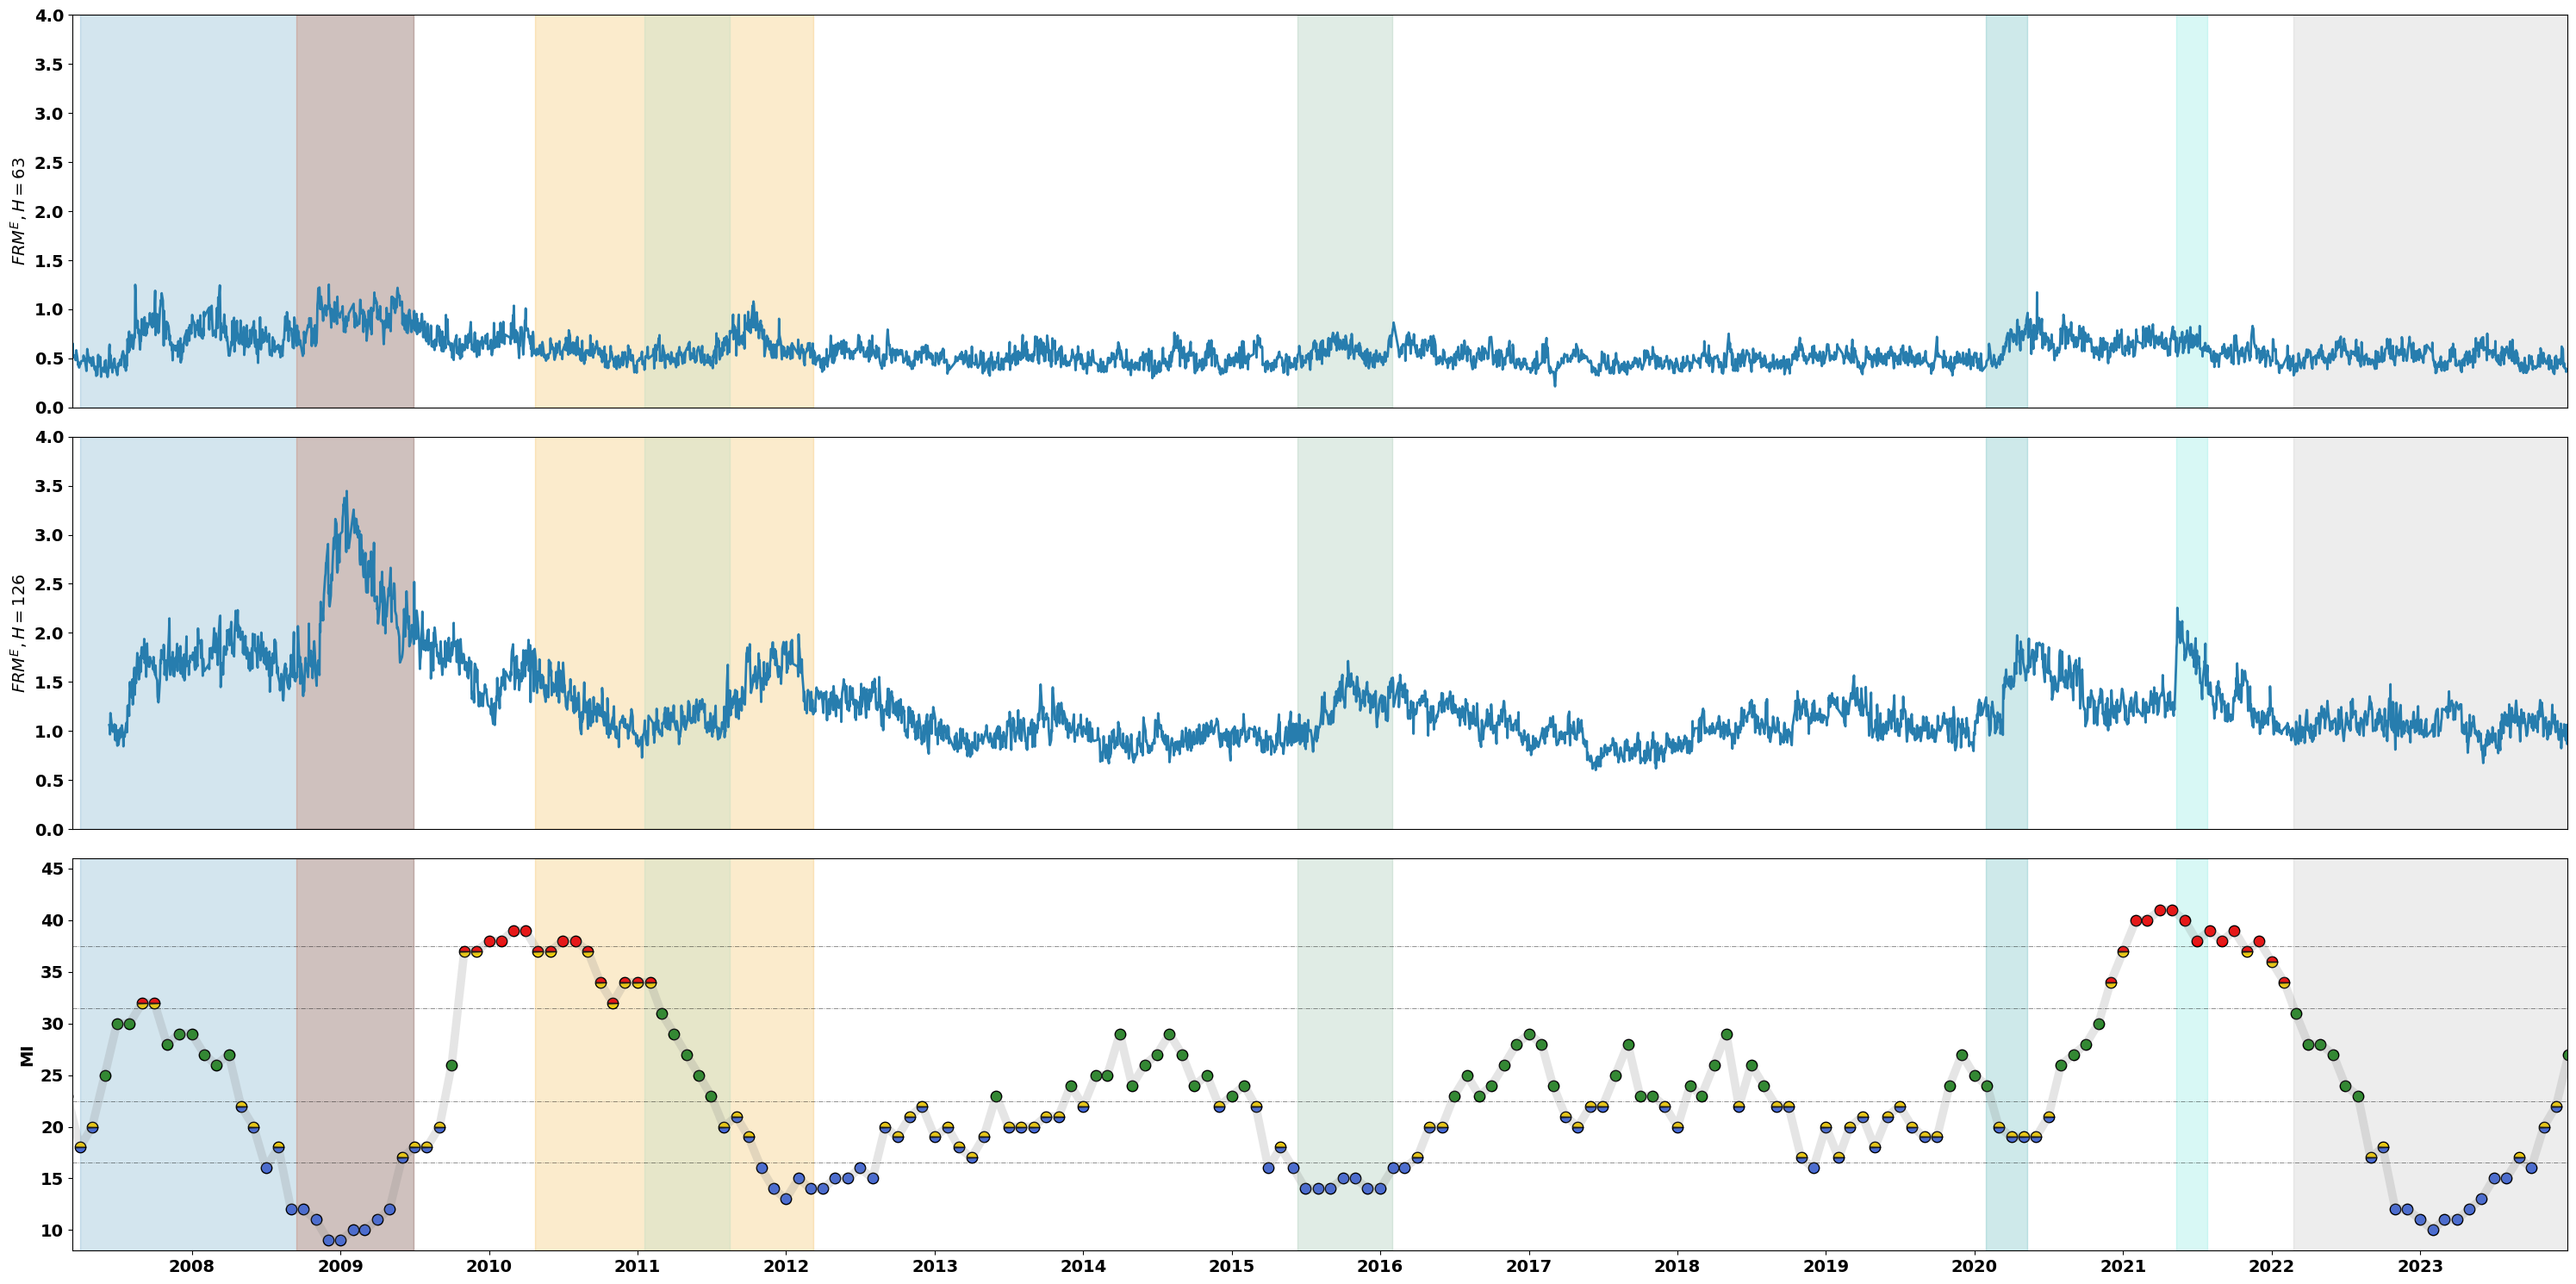

In [129]:
def create_semicircle(up=True):
    theta = np.linspace(0, np.pi, 50)
    x = np.cos(theta)
    y = np.sin(theta) if up else -np.sin(theta)
    verts = np.vstack([x, y]).T
    codes = [mpath.Path.MOVETO] + [mpath.Path.LINETO] * (len(verts) - 2) + [mpath.Path.CLOSEPOLY]
    return mpath.Path(verts, codes)

UpperHalfCircle = create_semicircle(up=True)
LowerHalfCircle = create_semicircle(up=False)

fig, axs = plt.subplots(3, 1, figsize=(30, 15))

colors = ['#277DAE', '#BF3100', '#EE9B00', '#94D2BD', '#64A47F', '#0A9396', '#40E0D0', 'darkgray', 'gray']
shaded_intervals = [
    ("2007-04-02", "2009-06-30"), # 次級房貸
    ("2008-09-15", "2009-06-30"), # 雷曼兄弟破產
    ("2010-04-23", "2012-03-09"), # 歐債危機
    ("2011-01-19", "2011-08-15"), # 美債危機
    ("2015-06-12", "2016-01-31"), # 中國股災
    ("2020-01-30", "2020-05-10"), # 第一次新冠
    ("2021-05-11", "2021-07-27"), # 第二次新冠
    ("2022-02-24", "2023-12-29")  # 烏俄戰爭、美國升息
]

count = 0
for start_date, end_date in shaded_intervals:
    axs[0].axvspan(pd.to_datetime(start_date), pd.to_datetime(end_date), color=colors[count], alpha=0.2)
    axs[1].axvspan(pd.to_datetime(start_date), pd.to_datetime(end_date), color=colors[count], alpha=0.2)
    axs[2].axvspan(pd.to_datetime(start_date), pd.to_datetime(end_date), color=colors[count], alpha=0.2)
    count += 1

axs[0].plot(FRM_2, linewidth=2, color=colors[0])
axs[0].set_xlim(FRM_2.index[0], FRM.index[-1])
axs[0].set_ylim(0, 4)
axs[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axs[0].set_ylabel(r'$FRM^E, H=63$', fontsize=14, fontweight='bold')

axs[1].plot(FRM, linewidth=2, color=colors[0])
axs[1].set_xlim(FRM_2.index[0], FRM.index[-1])
axs[1].set_ylim(0, 4)
axs[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axs[1].set_ylabel(r'$FRM^E, H=126$', fontsize=14, fontweight='bold')

axs[2].plot(MI['MI'], color='gray', linewidth=7, alpha=0.2)
axs[2].axhline(y=16.5, color='black', linestyle='-.', linewidth=0.6, alpha=0.5)
axs[2].axhline(y=22.5, color='black', linestyle='-.', linewidth=0.6, alpha=0.5)
axs[2].axhline(y=31.5, color='black', linestyle='-.', linewidth=0.6, alpha=0.5)
axs[2].axhline(y=37.5, color='black', linestyle='-.', linewidth=0.6, alpha=0.5)
for i in range(len(MI)):
    val = MI['MI'].iloc[i]
    if val < 17:
        axs[2].scatter(MI.index[i], val, color='royalblue', s=80, edgecolors='black', alpha=1)
    elif val < 23:
        axs[2].scatter(MI.index[i], val, color='gold', s=80, edgecolors='black', alpha=1, marker=UpperHalfCircle)
        axs[2].scatter(MI.index[i], val, color='royalblue', s=80, edgecolors='black', alpha=1, marker=LowerHalfCircle)
    elif val < 32:
        axs[2].scatter(MI.index[i], val, color='forestgreen', s=80, edgecolors='black', alpha=1)
    elif val < 38:
        axs[2].scatter(MI.index[i], val, color='red', s=80, edgecolors='black', alpha=1, marker=UpperHalfCircle)
        axs[2].scatter(MI.index[i], val, color='gold', s=80, edgecolors='black', alpha=1, marker=LowerHalfCircle)
    else:
        axs[2].scatter(MI.index[i], val, color='red', s=80, edgecolors='black', alpha=1)

axs[2].xaxis.set_major_locator(mdates.YearLocator(1))
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[2].set_xlim(FRM_2.index[0], FRM.index[-1])
axs[2].set_ylim(8, 46)
axs[2].set_ylabel('MI', fontsize=14, fontweight='bold')

for ax in axs:
    for label in ax.get_yticklabels():
        label.set_fontsize(14)
        label.set_fontweight('bold')
    for label in ax.get_xticklabels():
        label.set_fontsize(14)
        label.set_fontweight('bold')

fig.tight_layout()
plt.savefig('MI vs FRM.png', dpi=144, transparent=True)
plt.show()

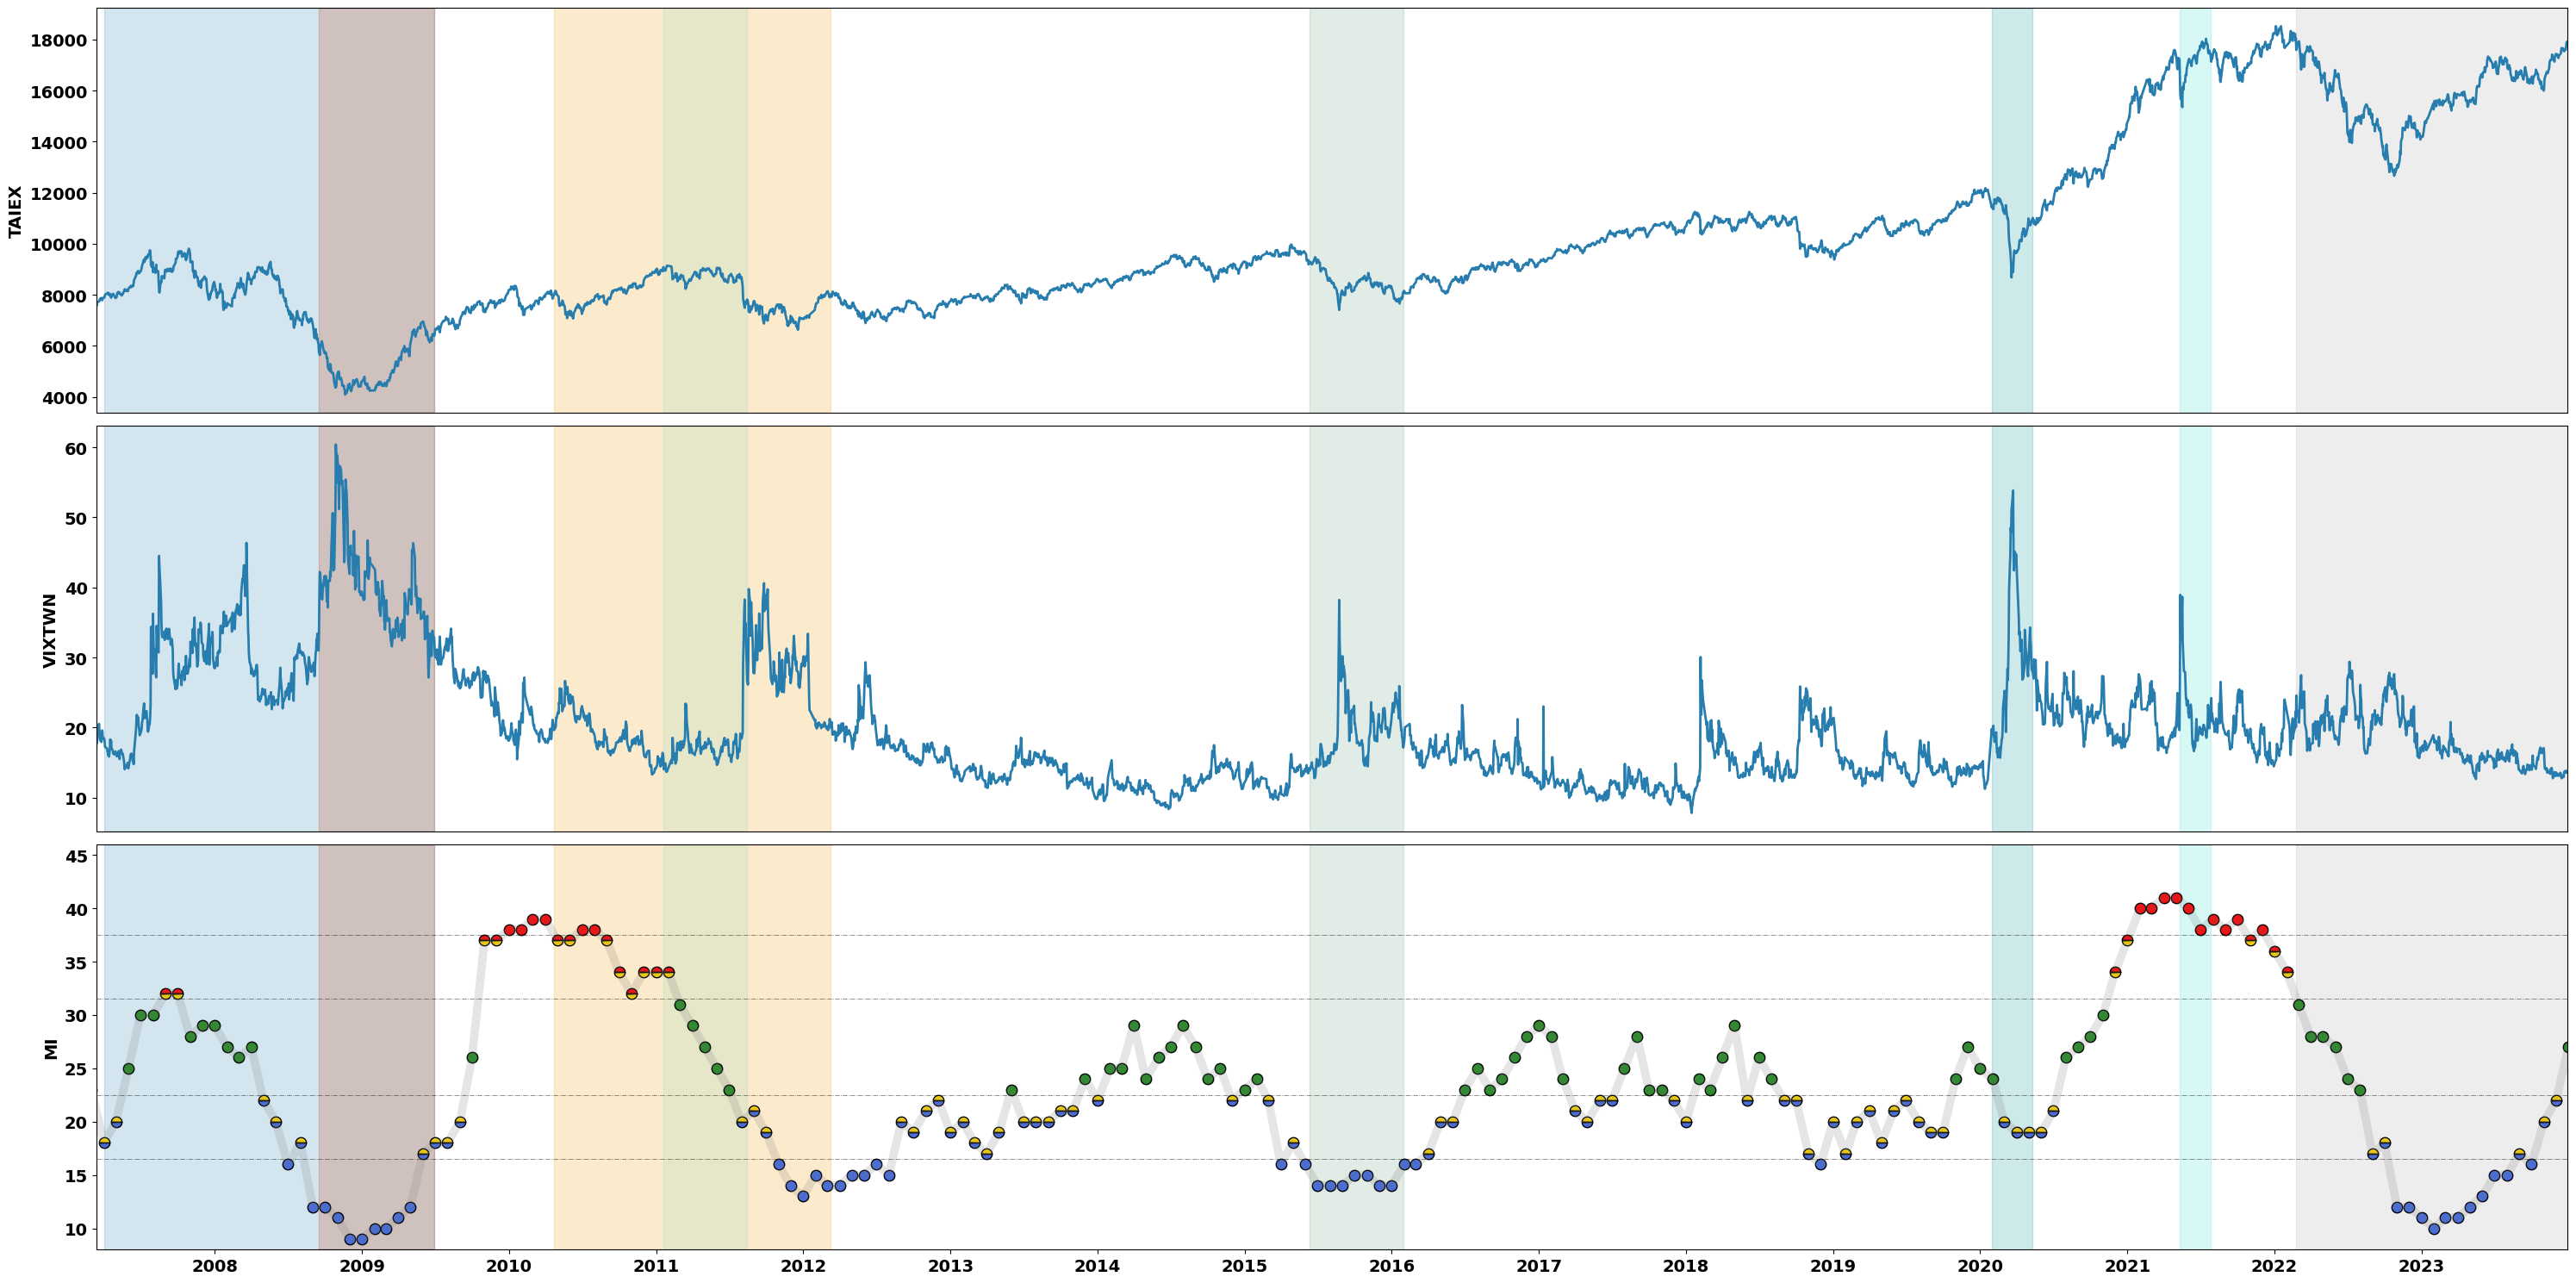

In [131]:
def create_semicircle(up=True):
    theta = np.linspace(0, np.pi, 50)
    x = np.cos(theta)
    y = np.sin(theta) if up else -np.sin(theta)
    verts = np.vstack([x, y]).T
    codes = [mpath.Path.MOVETO] + [mpath.Path.LINETO] * (len(verts) - 2) + [mpath.Path.CLOSEPOLY]
    return mpath.Path(verts, codes)

UpperHalfCircle = create_semicircle(up=True)
LowerHalfCircle = create_semicircle(up=False)

fig, axs = plt.subplots(3, 1, figsize=(30, 15))

colors = ['#277DAE', '#BF3100', '#EE9B00', '#94D2BD', '#64A47F', '#0A9396', '#40E0D0', 'darkgray', 'gray']
shaded_intervals = [
    ("2007-04-02", "2009-06-30"), # 次級房貸
    ("2008-09-15", "2009-06-30"), # 雷曼兄弟破產
    ("2010-04-23", "2012-03-09"), # 歐債危機
    ("2011-01-19", "2011-08-15"), # 美債危機
    ("2015-06-12", "2016-01-31"), # 中國股災
    ("2020-01-30", "2020-05-10"), # 第一次新冠
    ("2021-05-11", "2021-07-27"), # 第二次新冠
    ("2022-02-24", "2023-12-29")  # 烏俄戰爭、美國升息
]

count = 0
for start_date, end_date in shaded_intervals:
    axs[0].axvspan(pd.to_datetime(start_date), pd.to_datetime(end_date), color=colors[count], alpha=0.2)
    axs[1].axvspan(pd.to_datetime(start_date), pd.to_datetime(end_date), color=colors[count], alpha=0.2)
    axs[2].axvspan(pd.to_datetime(start_date), pd.to_datetime(end_date), color=colors[count], alpha=0.2)
    count += 1

axs[0].plot(index, linewidth=2, color=colors[0])
axs[0].set_xlim(FRM_2.index[0], FRM.index[-1])
axs[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axs[0].set_ylabel('TAIEX', fontsize=14, fontweight='bold')

axs[1].plot(VIX, linewidth=2, color=colors[0])
axs[1].set_xlim(FRM_2.index[0], FRM.index[-1])
axs[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axs[1].set_ylabel('VIXTWN', fontsize=14, fontweight='bold')

axs[2].plot(MI['MI'], color='gray', linewidth=7, alpha=0.2)
axs[2].axhline(y=16.5, color='black', linestyle='-.', linewidth=0.6, alpha=0.5)
axs[2].axhline(y=22.5, color='black', linestyle='-.', linewidth=0.6, alpha=0.5)
axs[2].axhline(y=31.5, color='black', linestyle='-.', linewidth=0.6, alpha=0.5)
axs[2].axhline(y=37.5, color='black', linestyle='-.', linewidth=0.6, alpha=0.5)
for i in range(len(MI)):
    val = MI['MI'].iloc[i]
    if val < 17:
        axs[2].scatter(MI.index[i], val, color='royalblue', s=80, edgecolors='black', alpha=1)
    elif val < 23:
        axs[2].scatter(MI.index[i], val, color='gold', s=80, edgecolors='black', alpha=1, marker=UpperHalfCircle)
        axs[2].scatter(MI.index[i], val, color='royalblue', s=80, edgecolors='black', alpha=1, marker=LowerHalfCircle)
    elif val < 32:
        axs[2].scatter(MI.index[i], val, color='forestgreen', s=80, edgecolors='black', alpha=1)
    elif val < 38:
        axs[2].scatter(MI.index[i], val, color='red', s=80, edgecolors='black', alpha=1, marker=UpperHalfCircle)
        axs[2].scatter(MI.index[i], val, color='gold', s=80, edgecolors='black', alpha=1, marker=LowerHalfCircle)
    else:
        axs[2].scatter(MI.index[i], val, color='red', s=80, edgecolors='black', alpha=1)

axs[2].xaxis.set_major_locator(mdates.YearLocator(1))
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[2].set_xlim(FRM_2.index[0], FRM.index[-1])
axs[2].set_ylim(8, 46)
axs[2].set_ylabel('MI', fontsize=14, fontweight='bold')

for ax in axs:
    for label in ax.get_yticklabels():
        label.set_fontsize(14)
        label.set_fontweight('bold')
    for label in ax.get_xticklabels():
        label.set_fontsize(14)
        label.set_fontweight('bold')

fig.tight_layout()
plt.savefig('MI vs Index.png', dpi=144, transparent=True)
plt.show()